# 2021/12/30
# 本代码绘制论文version1.2中的fig2附录
# 内容为对流层中低层的Q1

In [1]:
import os
import sys
import xarray as xr
import numpy as np
module_path = ["/home/sun/mycode/module/","/data5/2019swh/mycode/module/"]
sys.path.append(module_path[0])
from module_sun import *
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from metpy.units import units
from matplotlib.path import Path
import matplotlib.patches as patches
import matplotlib as mpl

In [6]:
path  =  "/home/sun/qomo-data/"
lev_slice  =  slice(850,500)
lon_slice  =  slice(40,120)
lat_slice  =  slice(-15,40)

lonmin,lonmax,latmin,latmax  =  50,115,-10,30
extent     =  [lonmin,lonmax,latmin,latmax]

 
f2  =  xr.open_dataset(path+"composite-Q1-merra2.nc").sel(level=lev_slice,lon=lon_slice,lat=lat_slice)  

q1_average  =  np.nanmean(np.nanmean(f2.Q1[0:30],axis=0),axis=0)

/tmp/ipykernel_837476/1386951052.py:12: RuntimeWarning: Mean of empty slice
  q1_average  =  np.nanmean(np.nanmean(f2.Q1[0:30],axis=0),axis=0)


In [7]:
q1_average.shape

(111, 129)

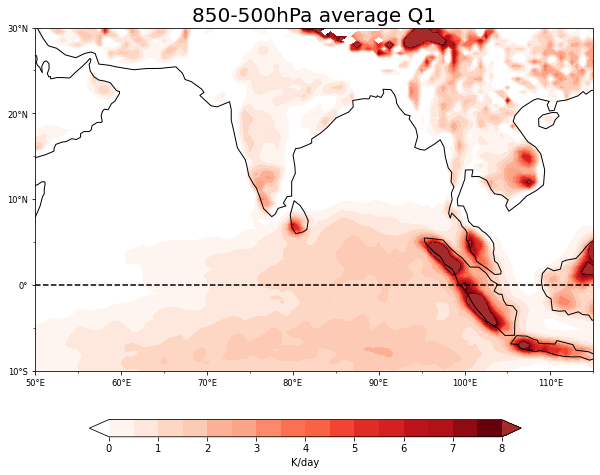

In [20]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

viridis = cm.get_cmap('Reds', 26)
newcolors = viridis(np.linspace(0, 1, 26))
#pink = np.array([1, 1, 1, 1])
#newcolors[0, :] =  pink
newcmp = ListedColormap(newcolors)
newcmp.set_under('white')
newcmp.set_over('brown')

dates  =  [-12,-9,-6,-3,0,3] #总共6张图
date   =  [18,21,24,27,30,33]
number =  ["a","b","c","d","e","f"]
props = dict(boxstyle='square', edgecolor='white', facecolor='white', alpha=1)

proj    =  ccrs.PlateCarree()
fig     =  plt.figure(figsize=(10,8))

ax = fig.add_subplot(projection=proj)
ax.coastlines(resolution='110m',lw=1)
# 设置经纬度刻度.
set_map_ticks(ax, dx=10, dy=10, nx=1, ny=1, labelsize='small')
ax.set_extent(extent, crs=proj)
            
ax.plot([50,120],[0,0],'k--')
im  =  ax.contourf(f2.lon,f2.lat,q1_average,np.linspace(0,8,17),cmap=newcmp,alpha=1,extend='both')
ax.set_title("850-500hPa average Q1",fontsize=20)
#ax.text(0.85,0.825,"850-500 average Q1",transform=ax.transAxes,bbox=props,fontsize=15)
#ax.text(0.05,0.825,"("+number[j]+")",transform=ax.transAxes,bbox=props,fontsize=15)

fig.subplots_adjust(top=0.8) 
cbar_ax = fig.add_axes([0.2, 0.05, 0.6, 0.03]) 
fig.colorbar(im, cax=cbar_ax, shrink=0.1, pad=0.1, orientation='horizontal',label='K/day')

plt.savefig("/home/sun/paint/lunwen/version1.2/fig2_version1.2_appendix_850-500_q1.pdf",dpi=300)
plt.show()